## Mini-Projet : Analyse Exploratoire du Catalogue Netflix
### 1. Introduction
L'objectif de ce projet est de réaliser une analyse exploratoire approfondie (EDA) du catalogue de Netflix. Nous allons examiner la répartition des contenus (Films vs Séries), l'évolution temporelle des ajouts, ainsi que la diversité géographique et les genres proposés.

Ce notebook suit une démarche structurée :
1. Chargement et nettoyage des données.
2. Analyse de la distribution des variables.
3. Exploration temporelle et géographique.
4. Visualisations avancées.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Configuration esthétique pour Seaborn
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Environnement initialisé avec succès.")

# Chargement du dataset
# On remonte d'un niveau (..) pour accéder au dossier data
try:
    df = pd.read_csv('../data/netflix_titles.csv')
    print(f"Dataset chargé avec succès : {df.shape[0]} lignes et {df.shape[1]} colonnes.")
except FileNotFoundError:
    print("Erreur : Le fichier CSV est introuvable. Vérifiez le chemin '../data/netflix_titles.csv'")

# Aperçu des 5 premières lignes
df.head()

Environnement initialisé avec succès.
Dataset chargé avec succès : 8807 lignes et 12 colonnes.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### 2. Nettoyage et Préparation des données

L'inspection initiale révèle des valeurs manquantes, principalement dans les colonnes `director`, `cast` et `country`.

In [11]:
# 1. Gestion des valeurs manquantes (Imputation)
# On remplit les trous par "Unknown" ou "Not Given" pour ne pas perdre la donnée
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# 2. Gestion des valeurs manquantes (Suppression des cas marginaux)
# On supprime les lignes où date_added ou rating sont vides (très peu de cas)
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

# 3. Conversion des types de données
# Conversion de date_added en format datetime standard

df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'])

# Extraction des composants temporels
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()

# Vérification finale
print("Nettoyage terminé.")
print(f"Nouvelle taille du dataset : {df.shape}")

print("Nombre de valeurs manquante")
df.isnull().sum()

Nettoyage terminé.
Nouvelle taille du dataset : (8790, 14)
Nombre de valeurs manquante


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September


### 3. Analyse des contenus : Films vs Séries
Nous examinons la proportion entre les films et les séries télévisées dans le catalogue.

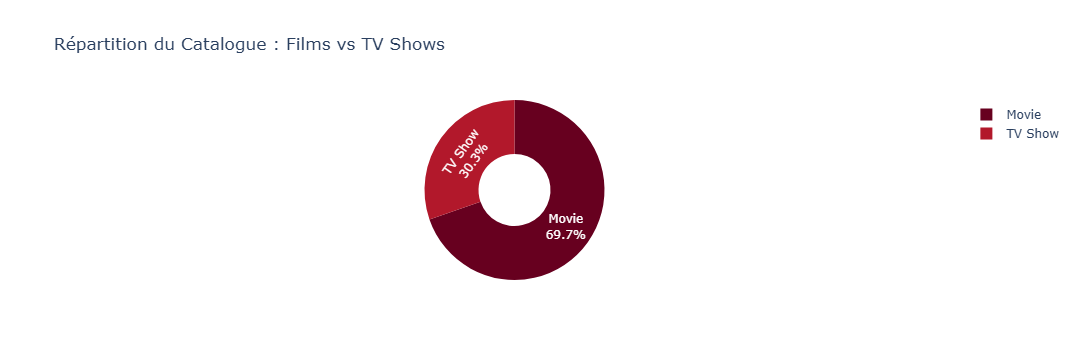

In [13]:
# Calcul de la répartition
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Création du graphique interactif (Pie Chart)
fig = px.pie(type_counts, 
             values='Count', 
             names='Type', 
             title='Répartition du Catalogue : Films vs TV Shows',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hole=0.4) # Donut chart style, plus moderne

# Mise en forme
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### 4. Analyse Temporelle : L'évolution du contenu
Nous analysons ici le rythme d'ajout des contenus sur la plateforme au fil des années.
Cette analyse permet d'identifier :
1. L'accélération de l'acquisition de contenus.
2. La différence de stratégie entre les Films et les Séries.

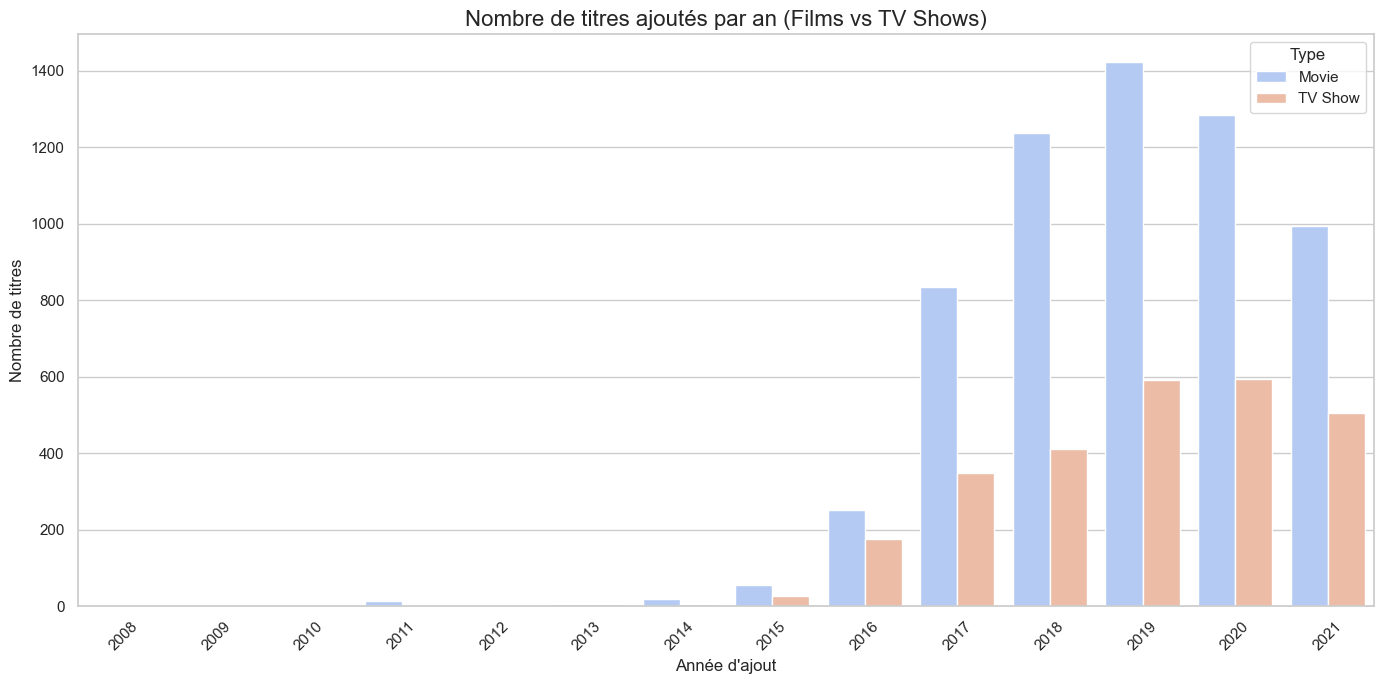

In [14]:
# On filtre pour éviter les années futures ou erreurs (ex: 2026) s'il y en a, et on se concentre sur les années pertinentes
current_year = pd.Timestamp.now().year
data_year = df[df['year_added'] < current_year] # On exclut l'année en cours si incomplète

# Création du graphique avec Seaborn
plt.figure(figsize=(14, 7))
sns.countplot(x='year_added', hue='type', data=data_year, palette='coolwarm')

plt.title('Nombre de titres ajoutés par an (Films vs TV Shows)', fontsize=16)
plt.xlabel('Année d\'ajout', fontsize=12)
plt.ylabel('Nombre de titres', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type')

# Affichage propre
plt.tight_layout()
plt.show()

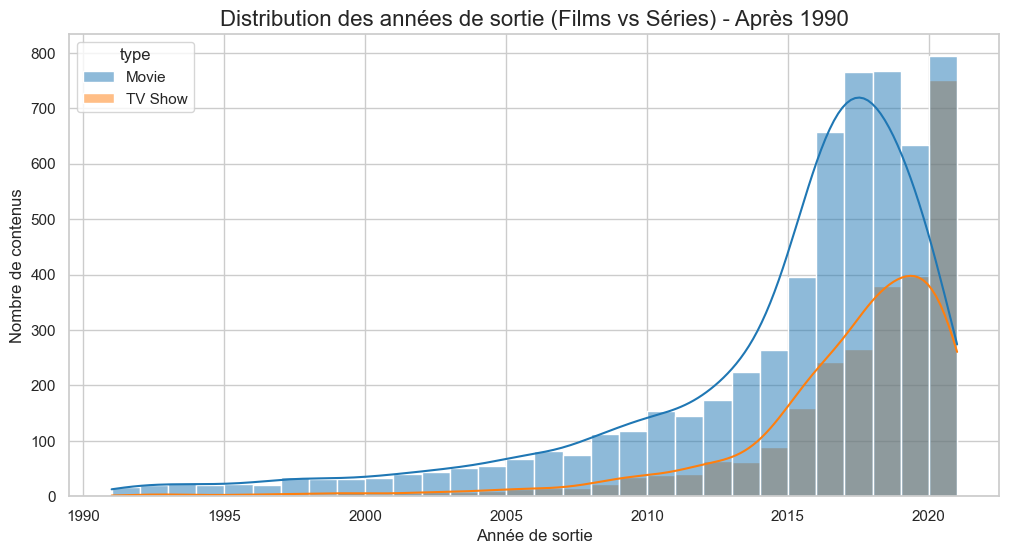

In [30]:
# Configuration de la taille
plt.figure(figsize=(12, 6))

# On se concentre sur les données après 1990 pour une meilleure lisibilité 
# (car il y a très peu de contenus avant, ce qui écraserait le graphique)
recent_data = df[df['release_year'] > 1990]

# Histogramme avec courbe de densité (KDE)
sns.histplot(data=recent_data, x='release_year', hue='type', kde=True, bins=30, palette='tab10')

plt.title('Distribution des années de sortie (Films vs Séries) - Après 1990', fontsize=16)
plt.xlabel('Année de sortie', fontsize=12)
plt.ylabel('Nombre de contenus', fontsize=12)
plt.show()

### 5. Analyse Géographique : Les pays producteurs
La colonne `country` contient souvent plusieurs pays pour une même œuvre (coproductions).
Pour une analyse rigoureuse, nous isolons chaque pays individuellement afin d'établir un classement réel des producteurs de contenu.

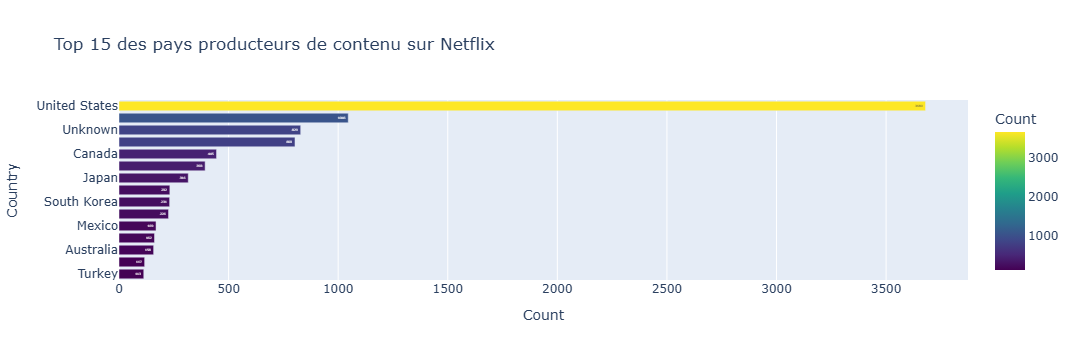

In [15]:
# 1. Traitement des données : Séparation des pays multiples
# On crée une copie pour ne pas toucher au df original
countries_df = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
countries_df = countries_df.reset_index()
countries_df.columns = ['title', 'country']

# 2. Comptage des occurrences (Top 15)
top_countries = countries_df['country'].value_counts().head(15).reset_index()
top_countries.columns = ['Country', 'Count']

# 3. Visualisation Interactive
fig = px.bar(top_countries, 
             x='Count', 
             y='Country', 
             orientation='h', # Barres horizontales pour lire les noms facilement
             title='Top 15 des pays producteurs de contenu sur Netflix',
             text='Count',
             color='Count',
             color_continuous_scale='Viridis')

# Inversion de l'axe Y pour avoir le 1er en haut
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

In [16]:
countries_df.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,Unknown
3,Jailbirds New Orleans,Unknown
4,Kota Factory,India


### 6. Analyse Sémantique : Nuage de mots des Genres
Visualisation des catégories (`listed_in`) les plus fréquentes pour comprendre l'identité du catalogue.

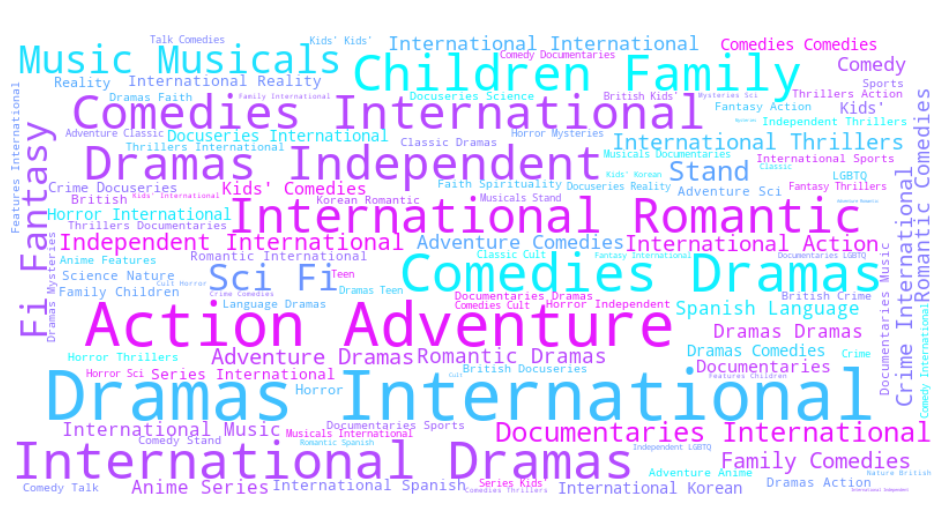

In [24]:
from wordcloud import WordCloud

# Concaténation de tous les genres
categories = ' '.join(df['listed_in']).replace('TV', '').replace('Shows', '').replace('Movies', '')

# Création du nuage
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='cool').generate(categories)

# Affichage
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Les genres les plus populaires sur Netflix', fontsize=16, color='white')
plt.show()

## 7. Analyse détaillée : Genres, Réalisateurs et Acteurs
Pour répondre aux exigences précises du projet, nous analysons ici :
1. **La fréquence exacte des genres** (au-delà du nuage de mots).
2. **Les réalisateurs et acteurs les plus prolifiques** de la plateforme.

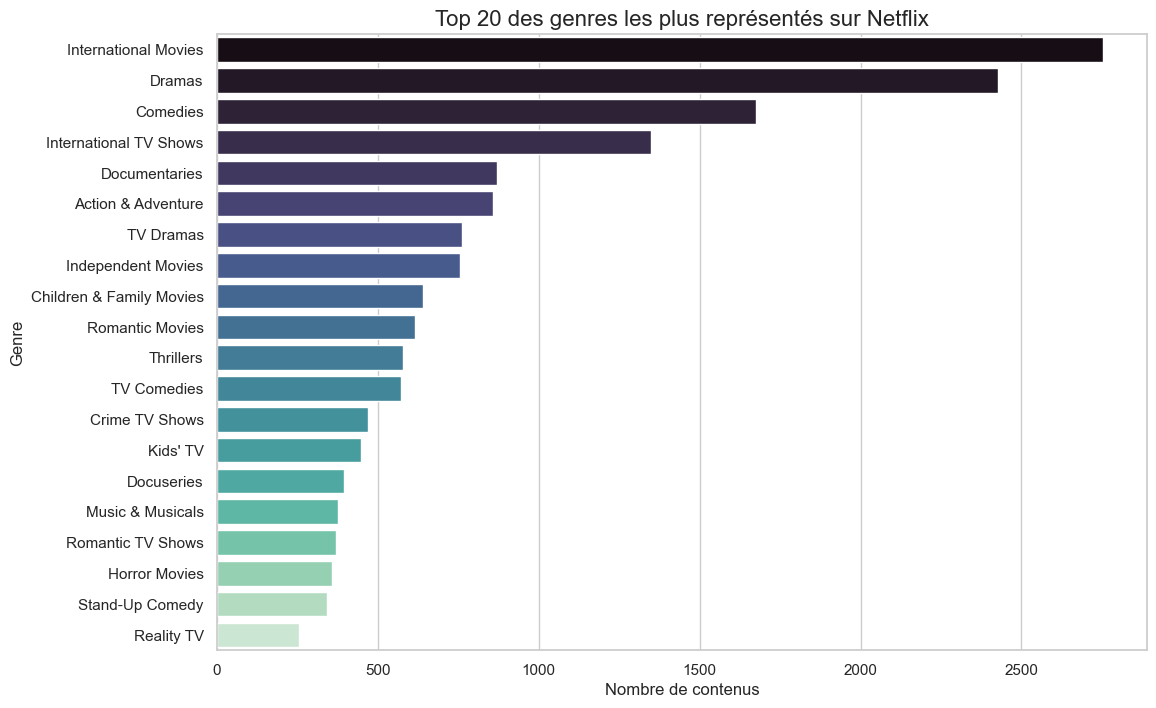

In [26]:
# 1. Traitement des Genres (listed_in)
# On sépare les genres comme on a fait pour les pays
genres_df = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres_df = genres_df.reset_index()
genres_df.columns = ['title', 'genre']

# Top 20 des genres
top_genres = genres_df['genre'].value_counts().head(20)

# Visualisation avec Seaborn (Barplot)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, legend=False, palette='mako')
plt.title('Top 20 des genres les plus représentés sur Netflix', fontsize=16)
plt.xlabel('Nombre de contenus', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

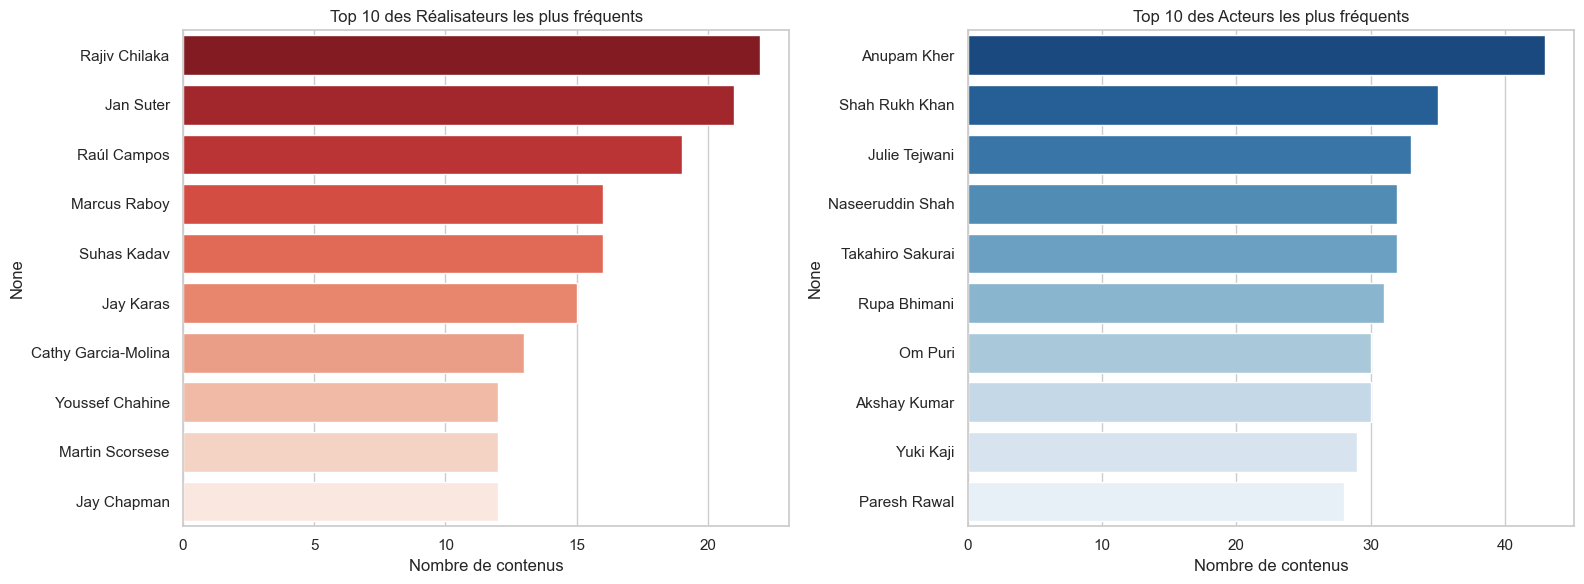

In [29]:
# Casting et Realisateurs

# Fonction utilitaire pour extraire et compter les éléments d'une colonne contenant des listes
def get_top_elements(dataframe, column_name, exclude_label='Unknown', top_n=10):
    elements = dataframe[column_name].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
    elements = elements[elements != exclude_label]
    return elements.value_counts().head(top_n)

# Calcul des Tops
top_directors = get_top_elements(df, 'director')
top_actors = get_top_elements(df, 'cast')

# Création d'une figure à deux volets (Subplots)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique 1: Réalisateurs
sns.barplot(
    x=top_directors.values, 
    y=top_directors.index, 
    hue=top_directors.index,
    ax=axes[0], 
    palette='Reds_r', 
    legend=False
)
axes[0].set_title('Top 10 des Réalisateurs les plus fréquents')
axes[0].set_xlabel('Nombre de contenus')

# Graphique 2 : Acteurs
sns.barplot(
    x=top_actors.values, 
    y=top_actors.index, 
    hue=top_actors.index,
    ax=axes[1], 
    palette='Blues_r', 
    legend=False
)
axes[1].set_title('Top 10 des Acteurs les plus fréquents')
axes[1].set_xlabel('Nombre de contenus')

plt.tight_layout()
plt.show()

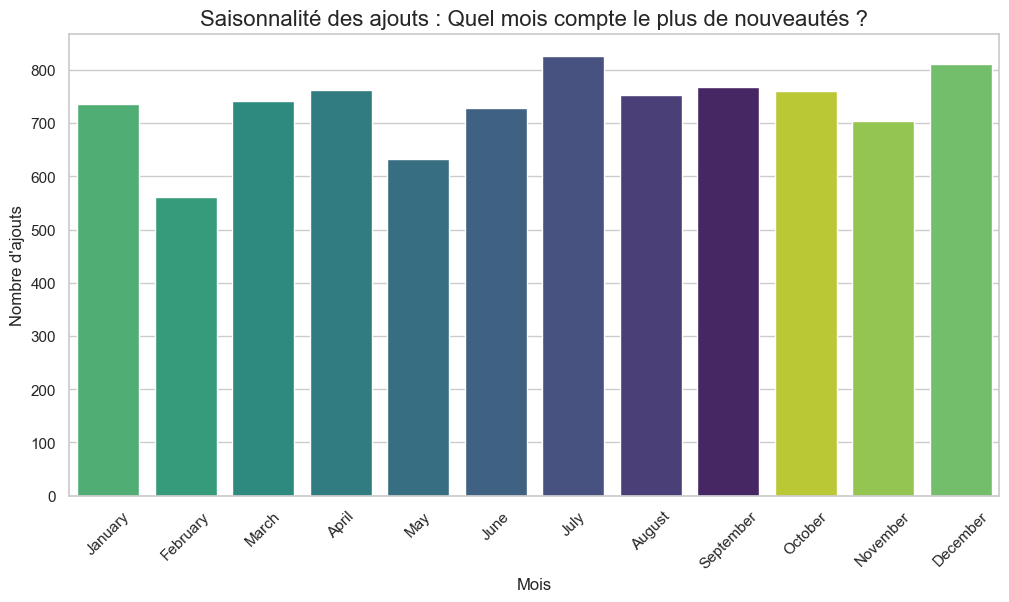

In [45]:
# --- Analyse Saisonnière : Quel est le meilleur mois pour Netflix ? ---

# Ordre chronologique des mois pour le graphique
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
sns.countplot(x='month_added', hue='month_added', data=df, order=month_order, palette='viridis', legend=False)

plt.title("Saisonnalité des ajouts : Quel mois compte le plus de nouveautés ?", fontsize=16)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre d\'ajouts', fontsize=12)
plt.xticks(rotation=45)
plt.show()

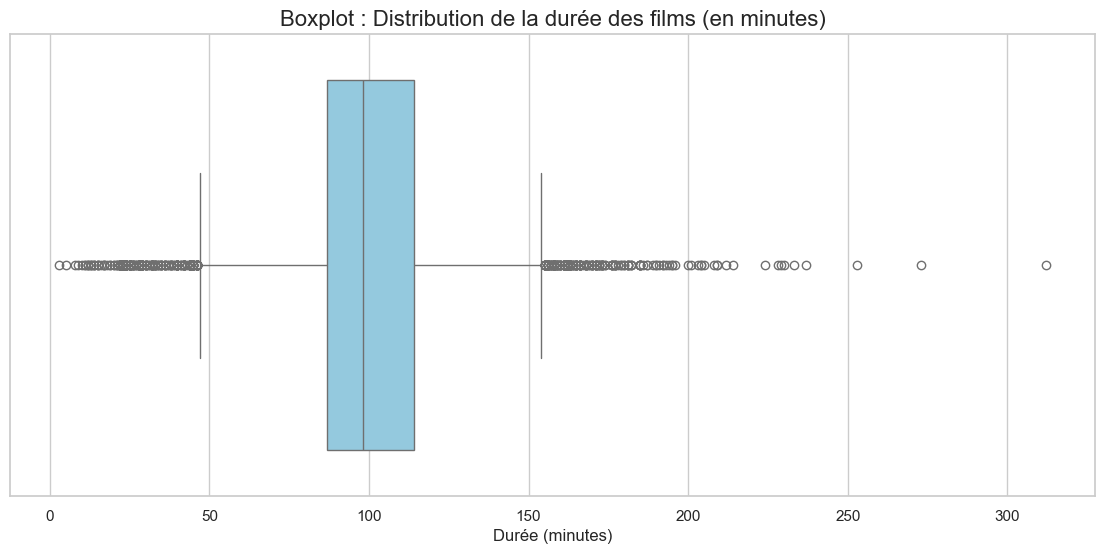

Statistiques descriptives de la durée des films :
count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_min, dtype: float64


In [40]:
# --- Analyse de la distribution de la durée (Boxplot) ---

# On extrait la durée en minutes pour les films uniquement
# .str.replace(' min', '') enlève le texte pour ne garder que le chiffre
df['duration_min'] = df.loc[df['type'] == 'Movie', 'duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(14, 6))
# Le Boxplot permet de voir la médiane et les outliers (films très longs ou très courts)
sns.boxplot(x='duration_min', data=df[df['type'] == 'Movie'], color='skyblue')

plt.title("Boxplot : Distribution de la durée des films (en minutes)", fontsize=16)
plt.xlabel("Durée (minutes)")
plt.show()

# Petite stat textuelle pour accompagner le graphique
print("Statistiques descriptives de la durée des films :")
print(df[df['type'] == 'Movie']['duration_min'].describe())